# __Back of the Battery Calculator__
---
# __2. Active Materials__

#### Copyright © Intercalation Ltd. All rights reserved.

<div>
<img src="images/fig_botb.png" width="800">
</div>




In the [first installment](https://intercalationstation.substack.com/p/botb-1-introduction-and-capacity) of our BotB series, we introduced the calculation of theoretical capacities of different electrode materials based on their molar masses.

We also covered some existing cell models, and since then, [Matt Lacey](http://lacey.se/) has shared his very useful [CellModel](https://github.com/mjlacey/cellmodels) along with some very interesting case studies.

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">For my interest: how many out there are interested in doing this sort of basic cell property modelling themselves? The code is not secret, so I could e.g. share it on Github with a bunch of Jupyter Notebook examples. I find it a useful reality check at least. Comment below... <a href="https://t.co/ySd7jj16zy">https://t.co/ySd7jj16zy</a></p>&mdash; Matt Lacey (@mjlacey) <a href="https://twitter.com/mjlacey/status/1427545083063250946?ref_src=twsrc%5Etfw">August 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Thanks to those who positively responded! Happy therefore to share my cell model code here: <a href="https://t.co/kGwdzZF30b">https://t.co/kGwdzZF30b</a><br><br>So far I have made 1 &#39;quickstart&#39; example of how to build a model similar to that nested in these quote tweets, and more to come later. To quickly summarise: 1/ <a href="https://t.co/MW1qrCRX4e">https://t.co/MW1qrCRX4e</a></p>&mdash; Matt Lacey (@mjlacey) <a href="https://twitter.com/mjlacey/status/1427686001510653957?ref_src=twsrc%5Etfw">August 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Based on Matt's flexible CellModel in Julia, we'll use BotB to deconstruct the properties and makeup of each component of a cell before building up our model in Python. Instead of using [Colab](https://colab.research.google.com/) we'll assemble the backend of the model and add an interactive UI for it very soon, so make sure you support Intercalation Station by hitting that ***[subscribe!](https://intercalationstation.substack.com/subscribe)***

---
## BotB Plan
1. Theoretical capacities [[link]](https://intercalationstation.substack.com/p/botb-1-introduction-and-capacity)
2. Active materials
3. Cell sandwich layers
4. Winding a cylindrical cell
5. Stacking a pouch cell
6. Prismatic cells
7. tbd
---

## Outline for BotB 2:
* A) Comparing practical and theoretical capacities of active materials
* B) Active material average discharge voltages
* C) Visualizing voltage and capacity together
* D) Defining an active material
* E) Defining an electrode composite
---

In [22]:
#Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Unit & uncertainty management
from pint import UnitRegistry
unit = UnitRegistry()
from uncertainties import ufloat

#Dictionaries with dot notation
from dotmap import DotMap

#Functions created for assembling electrode structures
from BotB_functions.fn import make_active
from BotB_functions.fn import make_composite
from BotB_functions.fn import print_struct

## A) Theoretical vs practical capacities

Actual reversible capacity is typically lower. For energy density, the higher the better for both anodes and cathodes

* Practical specific capacity [mAh/g]
* Theoretical specific capacity [mAh/g]
* Average voltage [V]
* Crystallographic density [g/cm3]

Again we can first import the active materials database:

In [23]:
df = pd.read_csv('activesDB.csv')
df

,name,name_long,formula,type,cap,V,n,density,theorycap
0,NCA,lithium nickel cobalt aluminium oxide,Li(Ni0.8Co0.15Al0.05)O2,cathode,210,3.860,1,4.850,279
1,LCO,lithium cobalt oxide,LiCoO2,cathode,165,3.860,1,5.100,274
2,LFP,lithium iron phosphate,LiFePO4,cathode,160,3.375,1,3.600,170
3,NMC622,lithium nickel manganese colbalt oxide,Li(Ni0.6Mn0.2Co0.2)O2,cathode,181,3.860,1,4.700,277
4,NMC811,lithium nickel manganese colbalt oxide,Li(Ni0.8Mn0.1Co0.1)O2,cathode,195,3.860,1,4.700,276
5,LTO,lithium titanate,Ti5O12,anode,167,1.550,3,3.430,186
6,Gr,graphite,C6,anode,344,0.170,1,2.240,372
7,Li,lithium metal,Li,anode,3862,0.000,1,0.534,3861
8,Si,silicon,Si,anode,2200,0.400,4,2.300,3817


Comparing the theoretical vs practical capacities for cathode active materials:

In [24]:
capdf = df[df.type=='cathode'][['name','cap','theorycap']]
capdf.columns = ['Name', 'Practical capacity [mAh.g-1]','Theoretical capacity [mAh.g-1]']
capdf

,Name,Practical capacity [mAh.g-1],Theoretical capacity [mAh.g-1]
0,NCA,210,279
1,LCO,165,274
2,LFP,160,170
3,NMC622,181,277
4,NMC811,195,276


## B) Active material voltages

* Average voltage also matters because the cell voltage is given by the difference between the cathode and anode voltage 
* This voltage is used to calculate how much energy is provided, not just charge in a battery
* We plot anodes below, for anodes the lower the average voltage, the higher the overall cell voltage becomes so lower the better

Comparing the average voltage for anode active materials:

In [25]:
Vdf = df[df.type=='anode'][['name','V']]
Vdf.columns = ['Name', 'Average voltage [V]']
Vdf

,Name,Average voltage [V]
5,LTO,1.55
6,Gr,0.17
7,Li,0.00
8,Si,0.40


## C) Visualizing capacity and voltage together
* For cathodes we want to choose one towards the top right of the plot to maximize cell energy
* For anodes we want to choose one towards the bottom right to maximize cell energy
* Other considerations come into play when actually pairing active materials for a cell, like rate capability and safety etc.


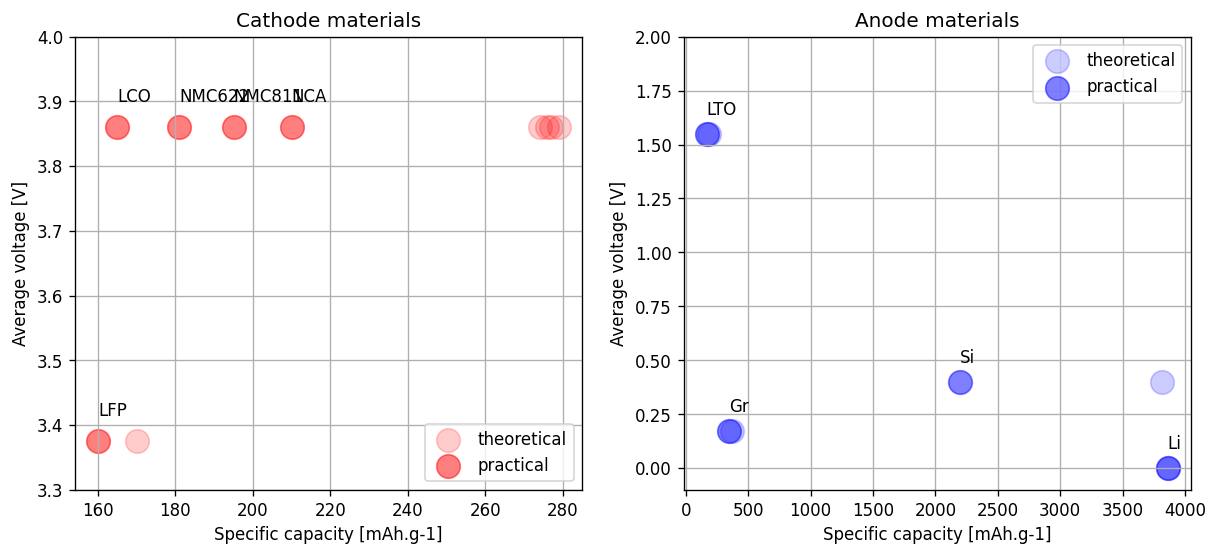

In [26]:
#Plot settings
fontsize = 10
figsz = (12,5)
dpi = 120
figure(figsize=figsz, dpi=dpi)
df = pd.read_csv('activesDB.csv')

#Plot cathode actives
ax = plt.subplot(1, 2, 1)
ax.scatter(df[df.type == 'cathode'].theorycap,df[df.type == 'cathode'].V,200,alpha = 0.2,color = 'r',label='theoretical')
ax.scatter(df[df.type == 'cathode'].cap,df[df.type == 'cathode'].V,200,alpha = 0.5,color = 'r',label='practical')
for i, txt in enumerate(df[df.type == 'cathode'].name):
    ax.annotate(txt, (df[df.type == 'cathode'].cap[i], 0.04+df[df.type == 'cathode'].V[i]))
plt.title('Cathode materials')
plt.xlabel('Specific capacity [mAh.g-1]',fontsize=fontsize)
plt.ylabel('Average voltage [V]',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.xlim([150,400])
plt.ylim([3.3,4])
plt.legend(fontsize=fontsize,loc='lower right')
plt.grid(True)

#Plot anode actives
ax = plt.subplot(1, 2, 2)
ax.scatter(df[df.type == 'anode'].theorycap,df[df.type == 'anode'].V,200,alpha = 0.2,color = 'b',label='theoretical')
ax.scatter(df[df.type == 'anode'].cap,df[df.type == 'anode'].V,200,alpha = 0.5,color = 'b',label='practical')
for i, txt in enumerate(df[df.type == 'anode'].name):
    ax.annotate(txt,(df[df.type == 'anode'].cap.to_numpy()[i], 0.09+df[df.type == 'anode'].V.to_numpy()[i]))
plt.title('Anode materials')
plt.xlabel('Specific capacity [mAh.g-1]',fontsize=fontsize)
plt.ylabel('Average voltage [V]',fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.xlim([150,400])
plt.ylim([-0.1,2])
plt.legend(fontsize=fontsize)
plt.grid(True)
plt.show()


---
# Active materials & electrode composites

For our actual cell model, our components will come together following the same structure used by Matt Lacey, where (+/-) denotes the positive or negative electrode:

```
Cell
    - Electrode (+)
        - Electrode composite (+)
            - Active material (+)
        - Current collector (+)
    - Electrode (-)
        - Electrode composite (-)
            - Active material (-)
        - Current collector (-)
    - Separator
    - Electrolyte
```

As positive and negative electrodes both have a capacity, the limiting capacity is the overall capacity of the cell. The cell voltage also comes from the potential difference between the positive and negative active material average voltages. To make assembling the cell components easier, we will make each component into its own structure. 

The active material refers to an actual crystal of the chemistry that is storing the lithium. Active materials have these following properties:

* **Active material**
    * name
    * specific capacity [mAh/g]
    * average voltage [V]
    * crystallographic density [g/cm3]

The electrode composite is the actual powdered coating of active materials. Because it is a powdered coating it has porosity and non-active binders etc that reduce the overall density and capacity of the actual coating. The electrode composite has these properties:

* **Electrode composite**
    * active material
    * thickness [um]
    * areal capacity [mAh/cm2]
    * active loading [g/cm2]
    * active fraction
    * porosity
    * composite_density [g/cm3]

Adrian Yao's substack post on [The Li(ttle) ion that could](https://honestenergy.substack.com/p/the-little-ion-that-could) has a great sketch that we can highlight to see what is considered an **"active material"** and what is the overall electrode **"composite"**:

<div>
<img src="images/fig1_active_composite.png" width="800">
</div>


---
Lets look at the properties for an NCA active material:

In [17]:
df[df.name=='NCA']

,name,name_long,formula,type,cap,V,n,density,theorycap
0,NCA,lithium nickel cobalt aluminium oxide,Li(Ni0.8Co0.15Al0.05)O2,cathode,210,3.86,1,4.85,279


---
The `make_active()` function makes a dotmap type dictionary that allows us to assign the properties for the active material. 

It also uses the `pint` package which allows us to embed units and the `uncertainties` package lets us propagate standard deviations.

We can input the "NCA" active material by using the following code:

In [18]:
#Make active struct
NCA = make_active(name='NCA',
                 speccap=210*unit.mA*unit.hr/unit.g, 
                 avgE=3.86*unit.V, 
                 density=4.85*unit.g/unit.cm**3,
                 unit=unit)

#See active struct
print_struct(NCA)

{
     "name": "NCA",
     "speccap": "210.0 hour * milliampere / gram",
     "avgE": "3.86 volt",
     "density": "4.85 gram / centimeter ** 3"
}


---
The `make_composite()` function makes a dotmap type dictionary that allows us to assign the properties for the electrode composite. 

It also uses the `pint` package which allows us to embed units and the `uncertainties` package lets us propagate standard deviations.

* `make_composite()` also lets us "fill the gaps", for example, if we know the areal capacity **arealcap** and composite density **density**, the other properties can automatically be calculated:


In [19]:
#Make NCA composite
composite = make_composite(active=NCA, 
                           arealcap = (3.5*unit.mA*unit.hr/unit.cm**2), 
                           density = (3.3*unit.g/unit.cm**3).plus_minus(0.1),
                           unit=unit)
print_struct(composite)

{
     "active": {
          "name": "NCA",
          "speccap": "210.0 hour * milliampere / gram",
          "avgE": "3.86 volt",
          "density": "4.85 gram / centimeter ** 3"
     },
     "arealcap": "3.5 hour * milliampere / centimeter ** 2",
     "thick": "(50.5 +/- 1.5) micrometer",
     "arealload": "(0.016666666666666666 +/- 0) gram / centimeter ** 2",
     "activefrac": 0.95,
     "porosity": "(0.284 +/- 0.022) dimensionless",
     "density": "(3.30 +/- 0.10) gram / centimeter ** 3"
}


---
* or if we fill `make_composite()` with the coating thickness **thick**, active fraction **activefrac**, and mass loading **arealload**, the other properties can automatically be calculated:

In [20]:
#Make NCA composite
composite = make_composite(active=NCA, 
                           thick = (50*unit.um).plus_minus(2), 
                           activefrac = 0.95,
                           arealload = (0.017*unit.g/unit.cm**2),
                           unit=unit) #works with & without error
A = print_struct(composite)

{
     "active": {
          "name": "NCA",
          "speccap": "210.0 hour * milliampere / gram",
          "avgE": "3.86 volt",
          "density": "4.85 gram / centimeter ** 3"
     },
     "arealcap": "(3.57 +/- 0.20) hour * milliampere / centimeter ** 2",
     "thick": "(50.0 +/- 2.0) micrometer",
     "arealload": "0.017 gram / centimeter ** 2",
     "activefrac": 0.95,
     "porosity": "(0.262 +/- 0.030) dimensionless",
     "density": "(3.40 +/- 0.24) gram / centimeter ** 3"
}


---
* if we fill `make_composite()` with properties that cannot fill the gaps or clash, an error will be thrown:

In [21]:
#Make NCA composite
composite = make_composite(active=NCA, 
                           thick = (50*unit.um).plus_minus(1), 
                           arealcap = (3*unit.mA*unit.hr/unit.cm**2),
                           arealload = (0.1*unit.g/unit.cm**2),
                           unit=unit) #works with & without error
A = print_struct(composite)
type(A)

ValueError: Conflicting defined electrode composite properties.

---
# Conclusion

* Hopefully, by playing around with the `make_composite()` function we can develop some intuition in how electrode composite properties relate to each other. For example, porosity is related to the ratio between crystal density and coating density. 

* Next time, we'll construct the rest of the components like separator, current collectors, and electrolyte that make up the rest of the cell sandwich.

**Please consider supporting Intercalation and BotB with a subscription. We'll work through some interesting case studies in the near future!**
***[Subscribe Now!](https://intercalationstation.substack.com/publish/post/%%checkout_url%%)***

